<a href="https://colab.research.google.com/github/theokunj/practice/blob/me592/ME_hw1_2_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision.datasets import MNIST as mnist
import torchvision.utils as tv_utils
import torch
import matplotlib.pyplot as plt
import einops as ein
import numpy as np

In [2]:
dataset = mnist("/content", download= True, train= True)
subset_indices = torch.arange(1000)
subset = torch.utils.data.Subset(dataset, subset_indices)

100%|██████████| 9.91M/9.91M [00:00<00:00, 61.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.88MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.05MB/s]


In [3]:
#create array of classes to plot historgram
subset_classes = []
subset_ims = []
for item in subset_indices:
  (img, cat) = (subset[item])
  subset_classes.append(cat)
  subset_ims.append(img)
#print(arr)

(array([ 97., 116.,  99.,  93., 105.,  92.,  94., 117.,  87., 100.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

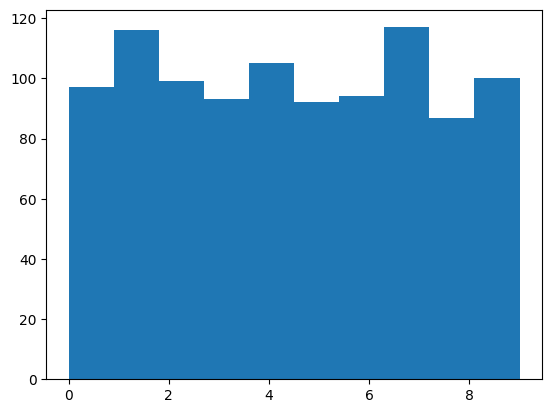

In [4]:
#plot histogram for classes in subset

plt.hist(subset_classes)
#plt.xticks()

In [5]:

img_array = np.asarray(subset_ims)
print(img_array.shape)


(1000, 28, 28)


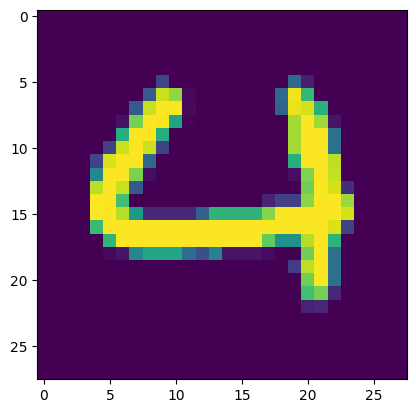

In [6]:
H = W = 28
img_show = img_array.reshape((img_array.shape[0],1,28,28)).transpose(0,2,3,1)
img_index = 60
plt.imshow(img_show[img_index,:,:,:])

(1000, 28, 28)
784
x flattened is  (784,)


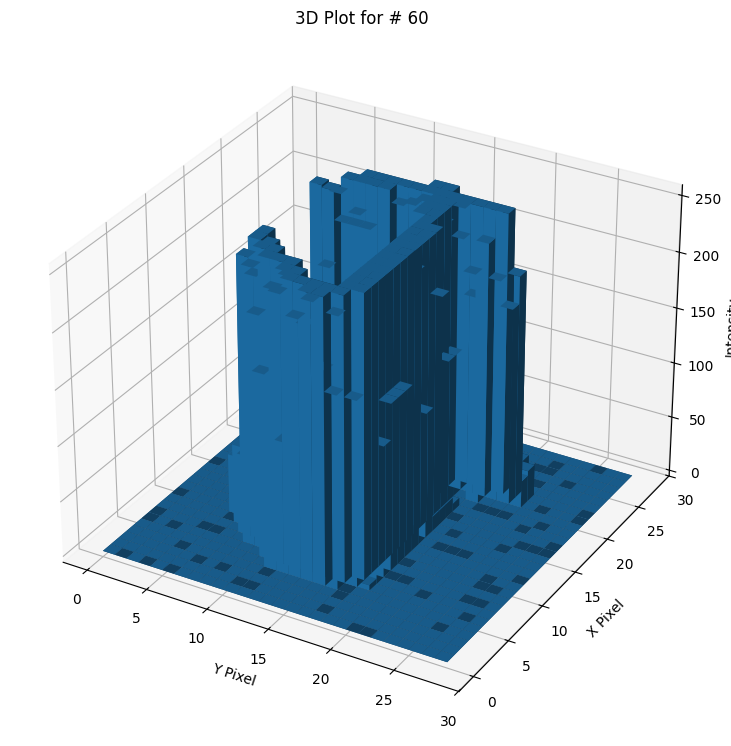

In [7]:
#grayscale pixel intensity plot
print(img_array.shape)
random_img = img_array[img_index]
img_size = 28*28
z = random_img.flatten()

print(len(z))


fig = plt.figure(figsize=(20, 10))
# 3D plot
ax1 = fig.add_subplot(121, projection='3d')

# Create a meshgrid
x_coords = np.arange(random_img.shape[1])
y_coords = np.arange(random_img.shape[0])
X, Y = np.meshgrid(x_coords, y_coords)

# Flatten the meshgrid coordinates to match the flattened z
x_flat = X.flatten()
y_flat = Y.flatten()
print("x flattened is ", x_flat.shape)

bottom = np.zeros_like(z, dtype=float)
width = 1
depth = 1


ax1.bar3d(y_flat, x_flat, bottom, width, depth, z, shade=True)

ax1.set_xlabel('Y Pixel')
ax1.set_ylabel('X Pixel')
ax1.set_zlabel('Intensity')
ax1.set_title(f'3D Plot for # {img_index}')

plt.show()

###Batch

In [27]:
#Batch images using einops
print(img_array.shape)
batch_size = 25
batched_img = ein.rearrange(img_array, "(b1 b2) h (w c)-> b1 b2 c h w", b2= batch_size, c = 1)
print(batched_img.shape)

(1000, 28, 28)
(40, 25, 1, 28, 28)
